## DSC540 project milestone 4
#### Author: Xin Tang
### date: 2/16/2024

#### Perform at least 5 data transformation and/or cleansing steps to your API data

In [1]:
# load necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import datetime

In [2]:
# make API call to get 5 days (every 3 hour) weather reading 
newurl ='https://api.openweathermap.org/data/2.5/forecast?lat=30.4224&lon=-97.7967&appid=ec83f46dfbe12662beeee4a7ae75a168'
data2 = requests.get(newurl).json()

In [3]:
# turn data into table
df = data2['list']
dfnew=pd.json_normalize(df, max_level=1)
dfnew.head(3)

,dt,weather,visibility,pop,dt_txt,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.sea_level,main.grnd_level,main.humidity,main.temp_kf,clouds.all,wind.speed,wind.deg,wind.gust,sys.pod,rain.3h
0,1707534000,"[{'id': 803, 'main': 'Clouds', 'description': ...",10000,0.00,2024-02-10 03:00:00,292.96,293.14,291.68,292.96,1012,1012,987,82,1.28,60,1.97,180,2.48,n,NaN
1,1707544800,"[{'id': 803, 'main': 'Clouds', 'description': ...",10000,0.03,2024-02-10 06:00:00,291.96,292.12,291.14,291.96,1012,1012,986,85,0.82,80,2.72,161,5.67,n,NaN
2,1707555600,"[{'id': 500, 'main': 'Rain', 'description': 'l...",10000,0.60,2024-02-10 09:00:00,290.57,290.69,290.57,290.57,1011,1011,985,89,0.00,100,2.01,193,3.24,n,0.67


###### transfrom 1. extract info out of dictionary

In [4]:
# weather is a dictionary inside list, so need to take info out. I am interested in weather description
# 'wlist' has description of weather at that time
w =dfnew['weather']

wlist=[]

for i in range(len(w)):
    a= w[i][0]
    print(a['description'])
    wlist.append(a['description'])    

broken clouds
broken clouds
light rain
light rain
light rain
light rain
moderate rain
light rain
overcast clouds
overcast clouds
light rain
moderate rain
light rain
broken clouds
clear sky
clear sky
clear sky
scattered clouds
scattered clouds
broken clouds
scattered clouds
few clouds
clear sky
clear sky
clear sky
clear sky
clear sky
clear sky
clear sky
clear sky
clear sky
clear sky
clear sky
clear sky
clear sky
clear sky
clear sky
clear sky
clear sky
clear sky


###### transfrom 2. convert string into date time

In [5]:
# currently the date and time info is string. convert it into datetime type, put them into 'fd' list
dt =dfnew['dt_txt']

fd = []
for i in range(len(dt)):
    newdate = datetime.datetime.strptime(dt[i], "%Y-%m-%d %H:%M:%S")
    fd.append(newdate)

###### transform 3. data cleanning by removing column not needed

In [6]:
# remove weather, visibility and pop, already extract weather info out.
second_df = dfnew.drop(dfnew.columns[[1,2,3]], axis=1)
second_df.head(3)

,dt,dt_txt,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.sea_level,main.grnd_level,main.humidity,main.temp_kf,clouds.all,wind.speed,wind.deg,wind.gust,sys.pod,rain.3h
0,1707534000,2024-02-10 03:00:00,292.96,293.14,291.68,292.96,1012,1012,987,82,1.28,60,1.97,180,2.48,n,NaN
1,1707544800,2024-02-10 06:00:00,291.96,292.12,291.14,291.96,1012,1012,986,85,0.82,80,2.72,161,5.67,n,NaN
2,1707555600,2024-02-10 09:00:00,290.57,290.69,290.57,290.57,1011,1011,985,89,0.00,100,2.01,193,3.24,n,0.67


###### transform 4: construct new data frame by adding additional column

In [7]:
# add weather summary and datatime back in
second_df['weather'] = wlist
second_df['date_time'] = fd

###### transform 5: rename and data manuipulate 

In [8]:
# rename main.feels_like column
second_df.rename(columns = {'main.feels_like':'feel temp in C'}, inplace = True) 
# convert the temperature to c degree
second_df['feel temp in C'] = second_df['feel temp in C']-273.15

In [ ]:
#create final df

In [9]:
final = second_df[['date_time','weather','feel temp in C','wind.speed']]
final.head(3)

,date_time,weather,feel temp in C,wind.speed
0,2024-02-10 03:00:00,broken clouds,19.99,1.97
1,2024-02-10 06:00:00,broken clouds,18.97,2.72
2,2024-02-10 09:00:00,light rain,17.54,2.01


###### transform 6. split the date_time to separated columns

In [10]:
# need to use original string
temp =dfnew['dt_txt']

#use space to split date and time
new = temp.str.split(" ", n=1, expand=True)
date = new[0]
time = new[1]
# keep the date_time for charting later
#final.drop(columns=["date_time"], inplace=True)
final['date']=date
final['time']=time

C:\Users\Daisy\AppData\Local\Temp\ipykernel_21604\1718364701.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['date']=date
C:\Users\Daisy\AppData\Local\Temp\ipykernel_21604\1718364701.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['time']=time


In [11]:
final.head()

,date_time,weather,feel temp in C,wind.speed,date,time
0,2024-02-04 18:00:00,clear sky,14.65,11.42,2024-02-04,18:00:00
1,2024-02-04 21:00:00,clear sky,15.96,8.77,2024-02-04,21:00:00
2,2024-02-05 00:00:00,few clouds,14.39,5.39,2024-02-05,00:00:00
3,2024-02-05 03:00:00,clear sky,11.22,3.98,2024-02-05,03:00:00
4,2024-02-05 06:00:00,clear sky,10.87,7.24,2024-02-05,06:00:00


###### transfrom 6. checking duplicate and NA

In [13]:
cols = final.columns
def Unique_Values():
    for i in np.arange(0,len(cols)):
        print('There are {} of unique values in {} column out of {}'.format(final[cols[i]].nunique(), cols[i], len(final)))
print(Unique_Values())

print('variables with NA values\n', final.isna().sum())

There are 4 of unique values in weather column out of 40
There are 39 of unique values in feel temp in C column out of 40
There are 31 of unique values in wind.speed column out of 40
There are 6 of unique values in date column out of 40
There are 8 of unique values in time column out of 40
None
variables with NA values
 weather           0
feel temp in C    0
wind.speed        0
date              0
time              0
dtype: int64


###### no empty cell and the duplicate are reasonable

###### transform 7. check outliner

looks no dramatic temp changes


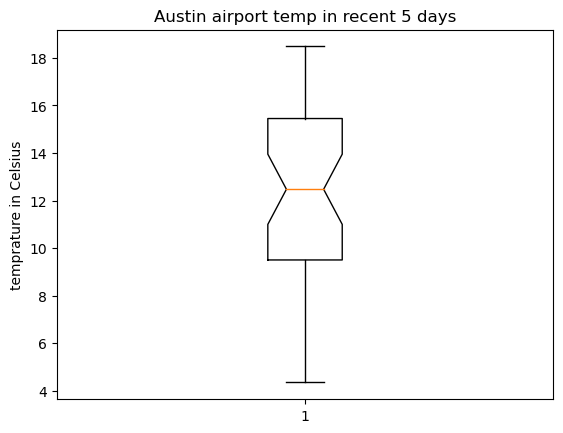

In [13]:
temp_check = final['feel temp in C']
plt.boxplot(temp_check, notch=True)
plt.title('Austin airport temp in recent 5 days')
plt.ylabel('temprature in Celsius')
print('looks no dramatic temp changes')

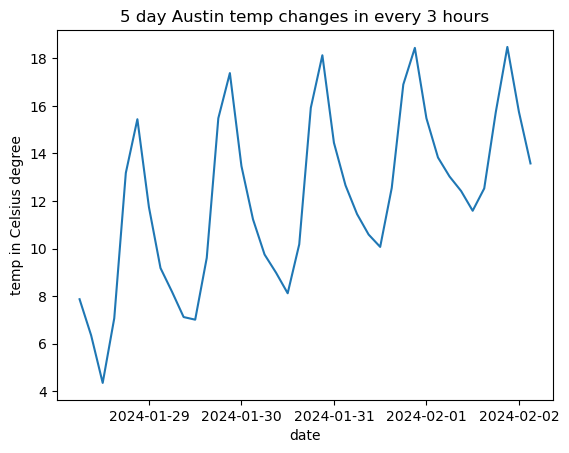

In [14]:
x=final['date_time']
y= temp_check
plt.plot(x,y)
plt.xlabel("date")  # add X-axis label
plt.ylabel("temp in Celsius degree")  # add Y-axis label
plt.title("5 day Austin temp changes in every 3 hours")  # add title
plt.show()

###### end of milestone 4 report

In [11]:
final.to_csv('austin_weather.csv')